In [20]:
!pip install keras-tuner
!pip install lime


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\srika\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\srika\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
# importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras_tuner import Hyperband
import tensorflow as tf
import lime
import lime.lime_tabular

In [22]:
# load the predictive maintenance dataset
Pred_main_data = pd.read_csv('C:\\Users\\srika\\Downloads\\archive\\ai4i2020.csv')
Pred_main_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# Initial Findings

In [23]:
# Remove the 'UDI' and 'Product ID' columns
Pred_main_data = Pred_main_data.drop(columns=['UDI', 'Product ID'])

# Encode the 'type' column categorical variables(low, mediam, high quality)
Pred_main_data['Type'] = Pred_main_data['Type'].map({'L': 0, 'M': 1, 'H': 2})

# statistics of the dataset
Pred_main_data.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [24]:
# Checking the missing values
print(Pred_main_data.isnull().sum())

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [25]:
# Check the data types of each column
print(Pred_main_data.dtypes)

Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [26]:
# print the count of target variables
Pred_main_data['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

# EDA

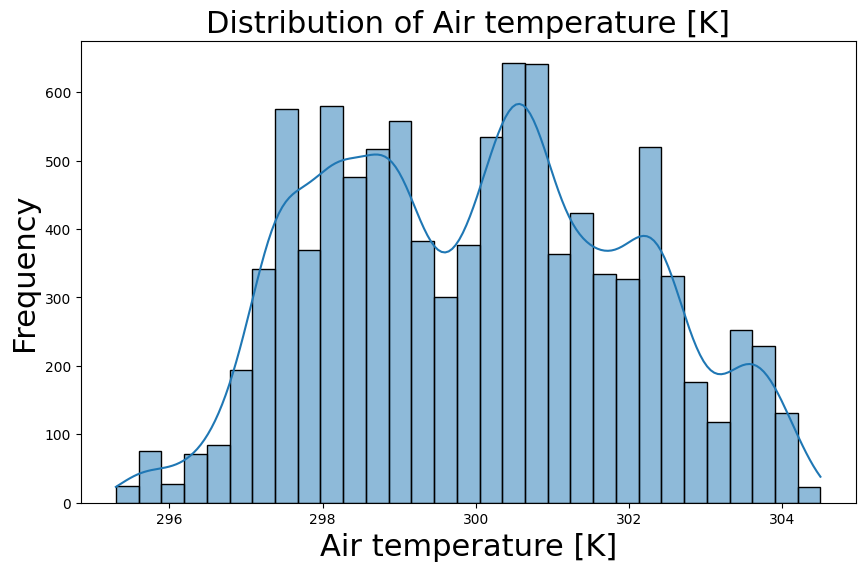

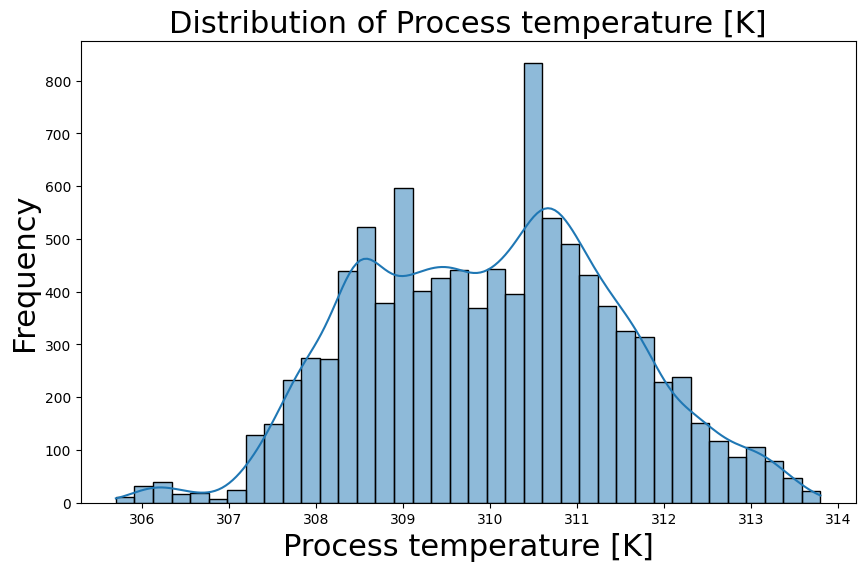

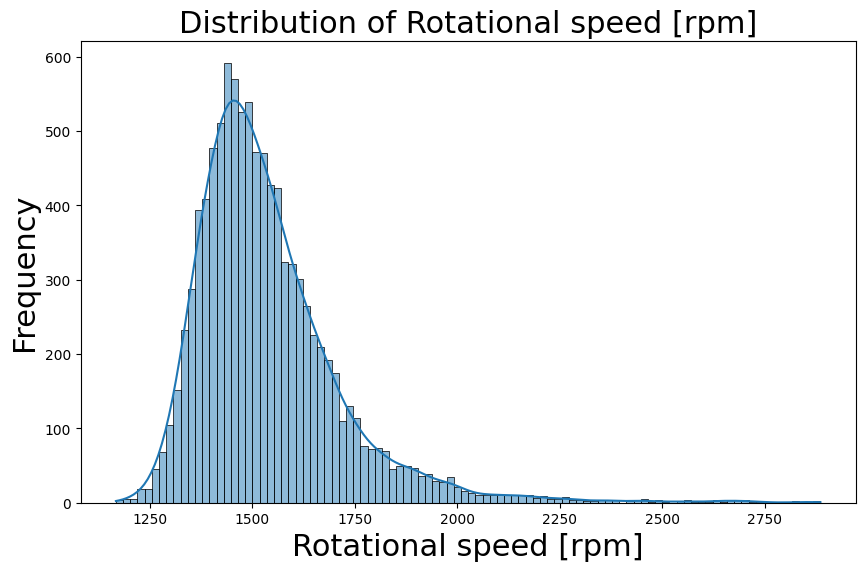

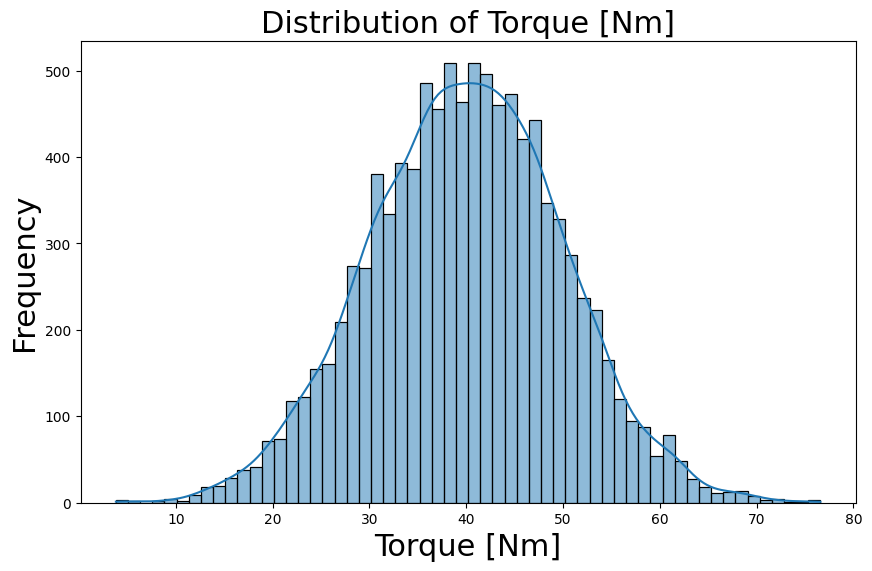

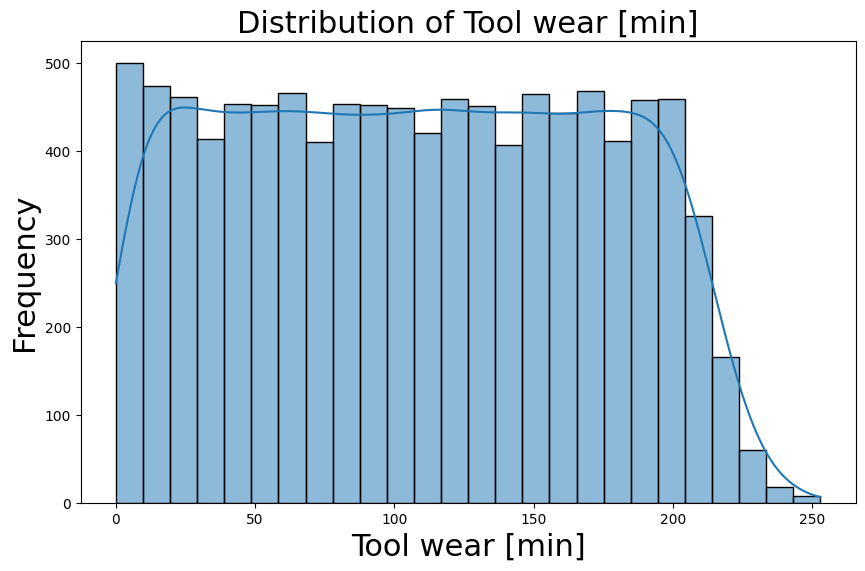

In [27]:
# List of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(Pred_main_data[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=22)
    plt.xlabel(feature,fontsize=22)
    plt.ylabel('Frequency',fontsize=22)
    plt.show()

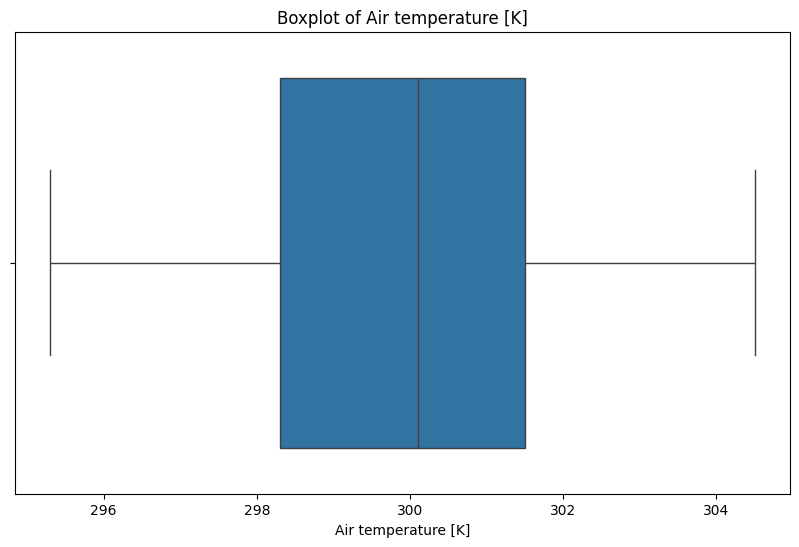

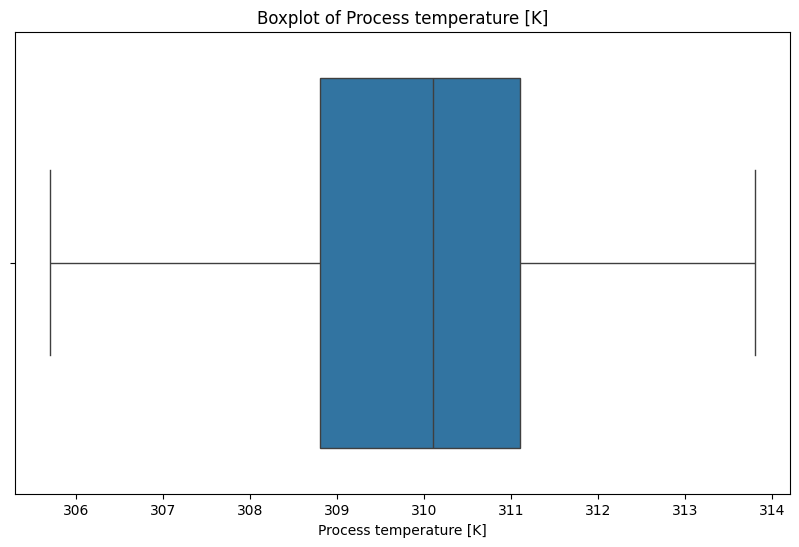

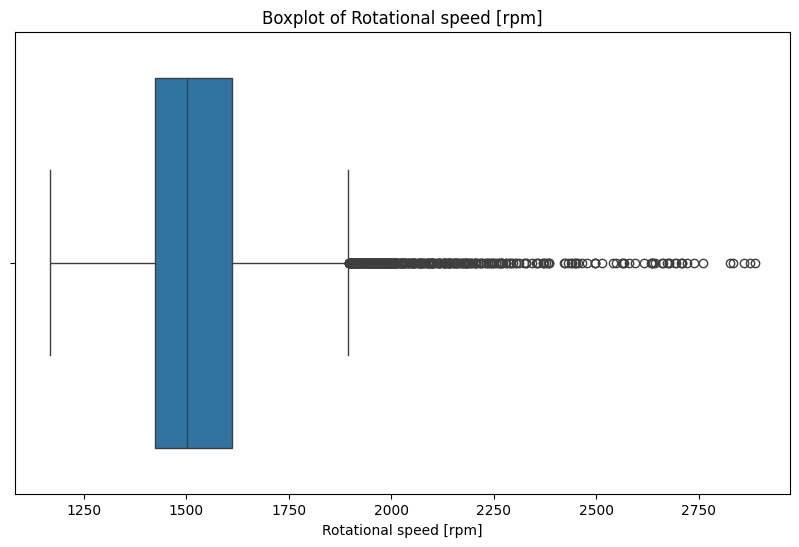

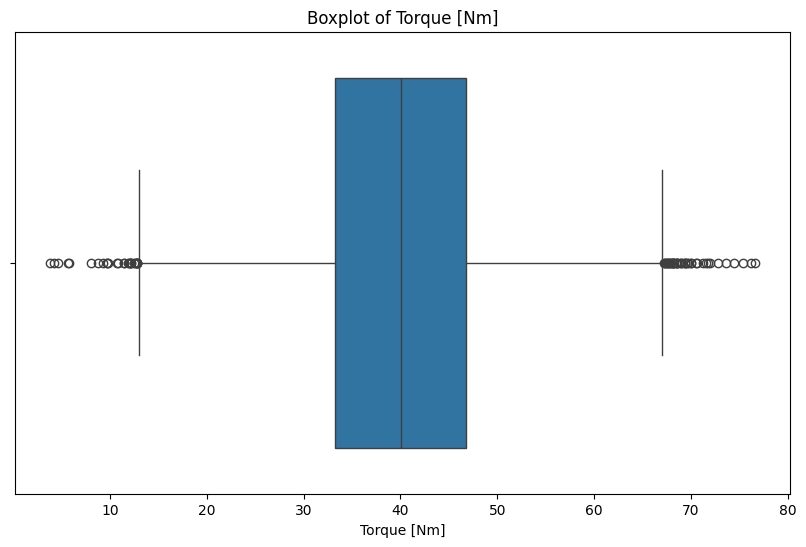

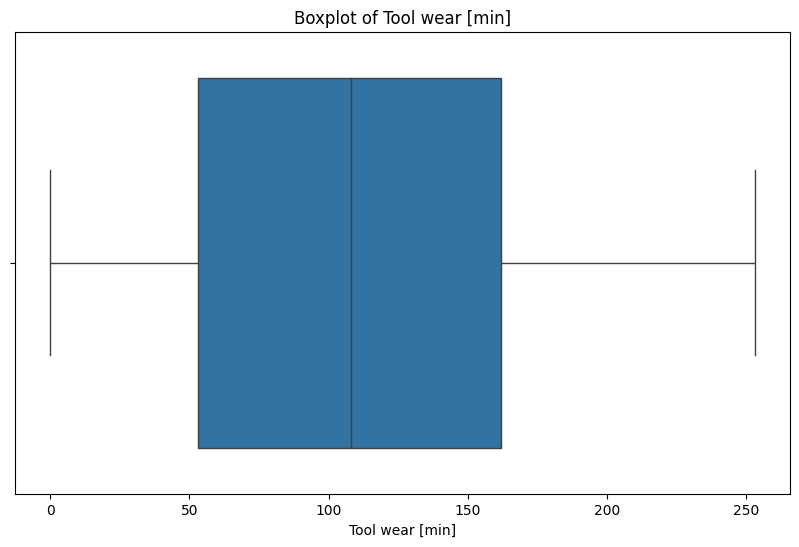

In [28]:
# Plot box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=Pred_main_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [29]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from 'Rotational speed [rpm]' and 'Torque [Nm]'
df = remove_outliers(Pred_main_data, 'Rotational speed [rpm]')
df = remove_outliers(Pred_main_data, 'Torque [Nm]')

# Verify the result
print("Dataset shape after removing outliers:", df.shape)

Dataset shape after removing outliers: (9931, 12)


In [30]:
Pred_main_data['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

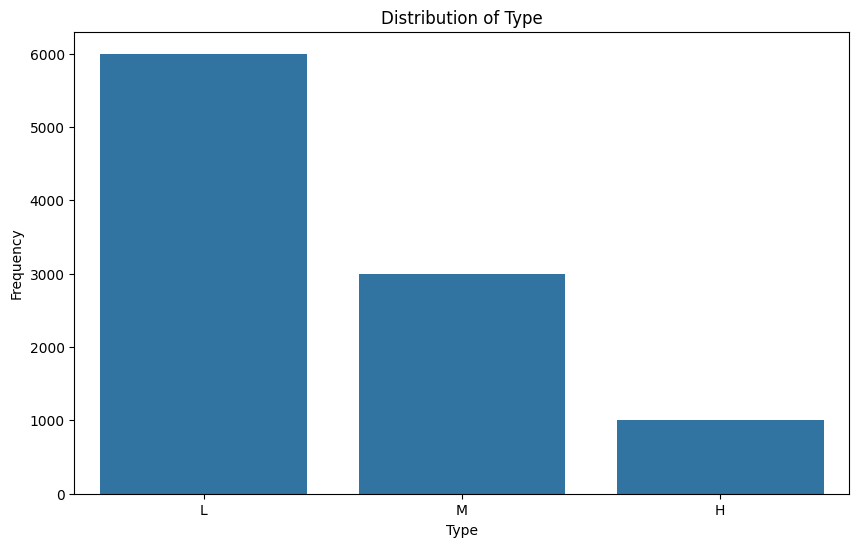

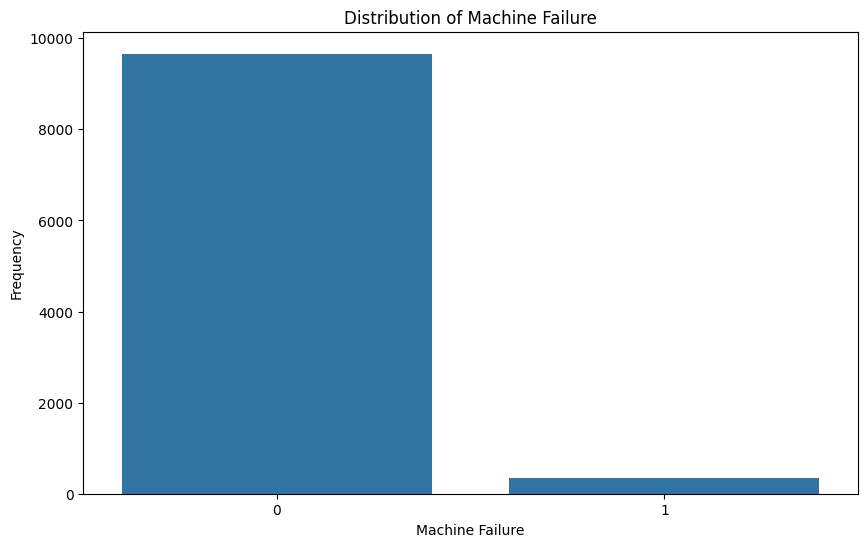

In [31]:
# Plot count plot for the 'Type' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=Pred_main_data)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['L', 'M', 'H'])
plt.show()

# Plot count plot for the 'Machine failure' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Machine failure', data=Pred_main_data)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Separate features and target
X = Pred_main_data.drop(columns=['Machine failure'])
y = Pred_main_data['Machine failure']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Machine failure'])], axis=1)

In [33]:
df_resampled['Machine failure'].value_counts()

Machine failure
0    9661
1    9661
Name: count, dtype: int64

In [34]:
df_resampled.shape

(19322, 12)

In [35]:
# Select numerical columns to normalize (excluding 'Machine failure' if it's your target variable)
numerical_cols = df_resampled.drop(columns=['Machine failure']).columns

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_resampled[numerical_cols] = scaler.fit_transform(df_resampled[numerical_cols])

# Display the first few rows to check the normalized data
df_resampled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.0,0.0,0.0,0.0,0


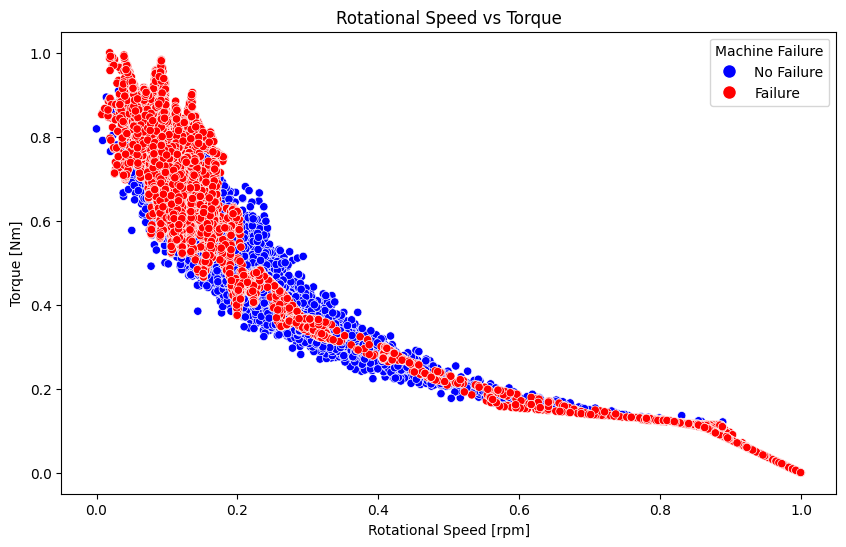

In [36]:
# Define colors for 'Failure' (red) and 'No Failure' (blue)
failure_colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(10, 6))
# Plot scatter plot with specific colors
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', data=df_resampled,
                palette=failure_colors)

plt.title('Rotational Speed vs Torque')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Torque [Nm]')

# Create custom legend
legend_labels = ['No Failure', 'Failure']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in failure_colors.values()]
plt.legend(legend_handles, legend_labels, title='Machine Failure')

plt.show()

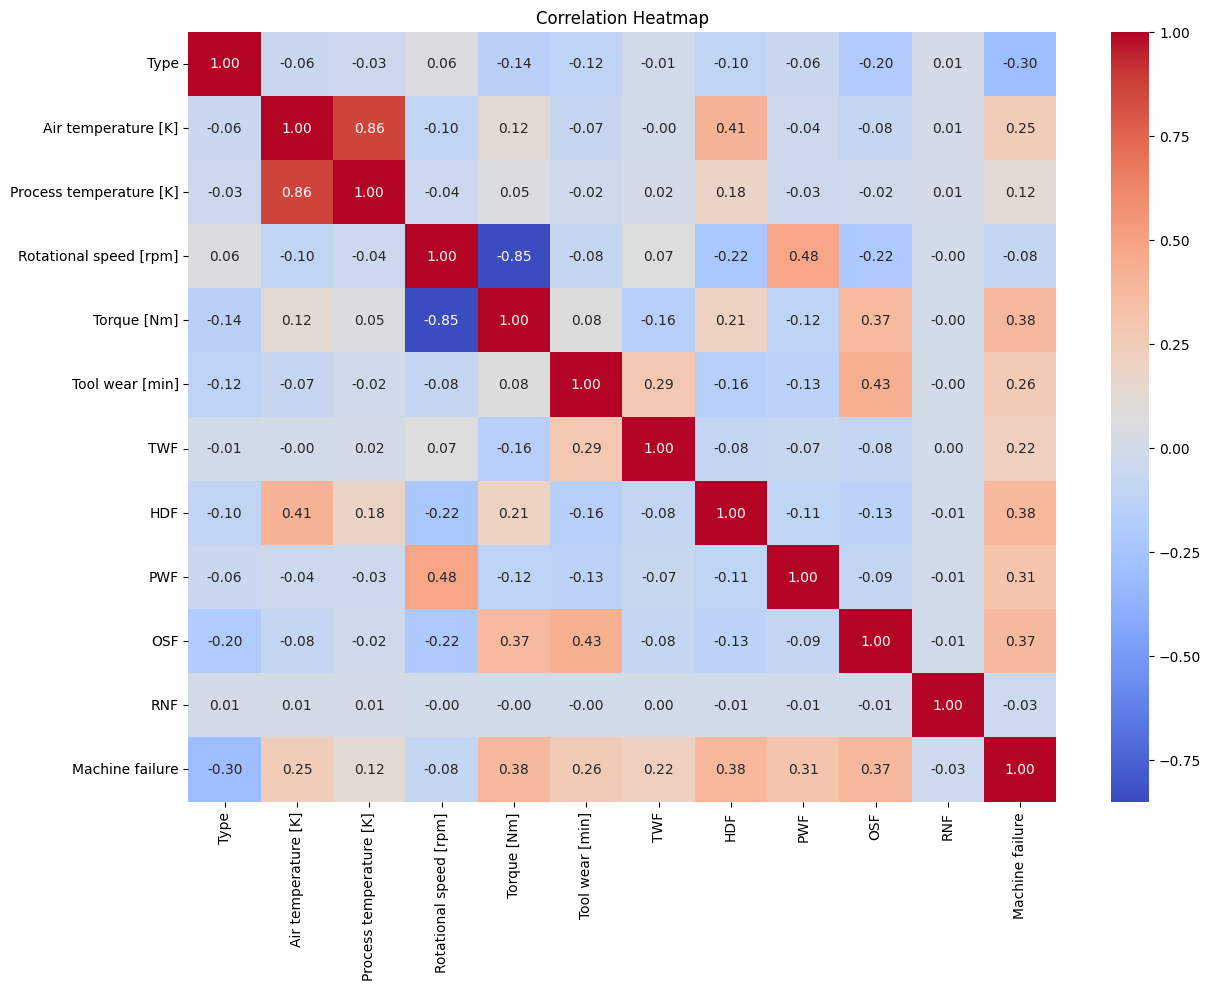

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# Separate features and target variable
X = df_resampled.drop(columns=['Machine failure'])
y = df_resampled['Machine failure']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Printing the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15457, 2)
X_test shape: (3865, 2)
y_train shape: (15457,)
y_test shape: (3865,)
